NB to define ground truth model and generate data for single substrate, single product ireversible enzyme-mediated reaction.  

1) Define ODE system, solver

In [1]:
import numpy as np
from scipy.integrate import odeint

def toyEnzRHS(y, t, theta):
    # Unpack states, params
    S, E, ES, P = y
    k, kr, kcat = theta

    dydt = [kr*ES - k*E*S, 
            (kr + kcat)*ES - k*S*E,
            k*E*S - (kr + kcat)*ES,
            kcat*ES]
    return dydt

def solveToyEnz(y0, theta, solvedT, tsID):
    sol = odeint(lambda y,t : toyEnzRHS(y, t, theta), y0, solvedT)
    
    paramID = "".join(str(theta).strip("()").split())
    np.savetxt('toyEnzData_' + paramID + '_' + tsID + '.txt', sol)
    return sol

2) Construct data for dense, evenly spaced sampling and plot
3) Construct data for sparse sampling, evenly spaced
4) Construct data for dense initial sampling, sparse final sampling
5) Construct data for randomly selected timing of samples

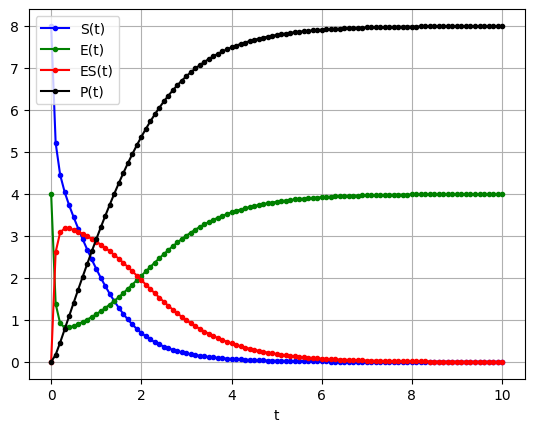

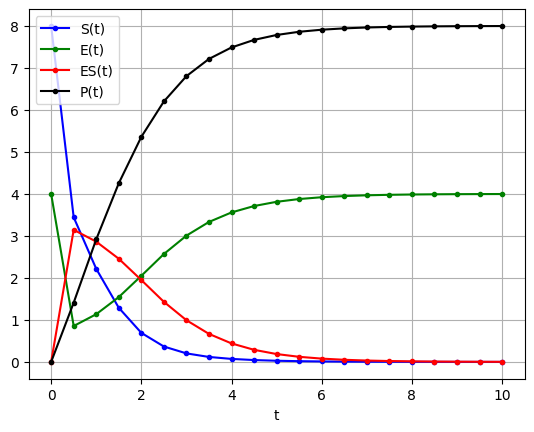

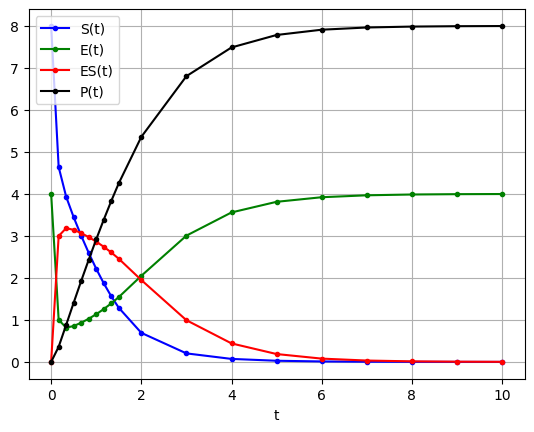

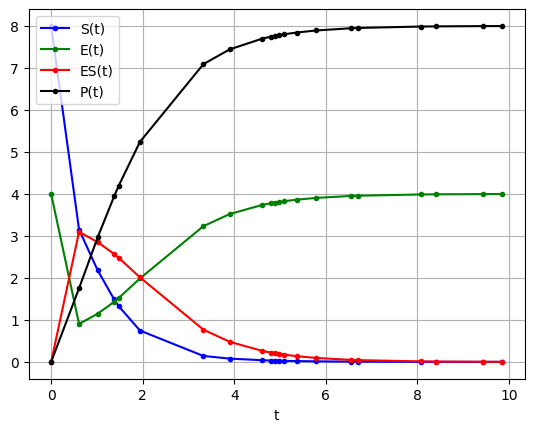

In [11]:
import matplotlib.pyplot as plt

k = 2 
kr = 1
kcat = 1

theta_ = k, kr, kcat



# 2)
solT1 = np.linspace(0, 10, 101)
sol1 = solveToyEnz((8,4,0,0), theta_, solT1, "dense")

# 3)
solT2 = np.linspace(0, 10, 21)
sol2 = solveToyEnz((8,4,0,0), theta_, solT2, "sparse")

# 4) 
solT3 = np.append(np.linspace(0, 1.5, 10), np.linspace(2, 10, 9))
sol3 = solveToyEnz((8,4,0,0), theta_, solT3, "sparseInit")

# 5)
solT4 = np.insert(np.sort(np.random.uniform(0, 10, 20)), 0, 0., axis=0)
sol4 = solveToyEnz((8,4,0,0), theta_, solT4, "random")


def plotToyEnz(solT, sol):
    plt.plot(solT, sol[:, 0], '-ob', label='S(t)', ms=3)
    plt.plot(solT, sol[:, 1], '-og', label='E(t)', ms=3)
    plt.plot(solT, sol[:, 2], '-or', label='ES(t)', ms=3)
    plt.plot(solT, sol[:, 3], '-ok', label='P(t)', ms=3)
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()
    return

plotToyEnz(solT1, sol1)
plotToyEnz(solT2, sol2)
plotToyEnz(solT3, sol3)
plotToyEnz(solT4, sol4)

In [5]:
sol1.size

404

Combinatorial library construction:

In [33]:
from itertools import combinations, chain, product
import sympy as sp

def powerset(symlst):
    s = list(symlst)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def makeOrder(maxOrder, numsym):
    return list(product(np.arange(maxOrder+1), repeat = numsym))

def makeLibTerms(symlst, maxOrder):
    ordlst = makeOrder(maxOrder, len(symlst))
    return list(map(np.prod, [tuple(map(sp.Pow, symlst, i)) for i in ordlst]))

makeLibTerms(sp.symbols('S, E, ES, P'), 3)

In [ ]:
model.score

model.feature_names_in_